In [5]:
import matplotlib.pyplot as plt
import gensim
import numpy as np
import spacy

In [15]:
import os

In [87]:
nlp = spacy.load('en')

### Using lee_background.cor text data available in gensim

In [88]:
test_data_dir = '{}'.format(os.sep).join([gensim.__path__[0], 'test', 'test_data'])
lee_train_file = test_data_dir + os.sep + 'lee_background.cor'
text = open(lee_train_file).read()

In [89]:
text

'Hundreds of people have been forced to vacate their homes in the Southern Highlands of New South Wales as strong winds today pushed a huge bushfire towards the town of Hill Top. A new blaze near Goulburn, south-west of Sydney, has forced the closure of the Hume Highway. At about 4:00pm AEDT, a marked deterioration in the weather as a storm cell moved east across the Blue Mountains forced authorities to make a decision to evacuate people from homes in outlying streets at Hill Top in the New South Wales southern highlands. An estimated 500 residents have left their homes for nearby Mittagong. The New South Wales Rural Fire Service says the weather conditions which caused the fire to burn in a finger formation have now eased and about 60 fire units in and around Hill Top are optimistic of defending all properties. As more than 100 blazes burn on New Year\'s Eve in New South Wales, fire crews have been called to new fire at Gunning, south of Goulburn. While few details are available at th

In [118]:
my_stop_words = [u'say', u'\'s', u'mr', u'be', u'said', u'says', u'saying', 'today']
for stopword in my_stop_words:
    lexeme = nlp.vocab[stopword]
    lexeme.is_stop = True

In [119]:
doc = nlp(text.lower())


In [120]:
doc

hundreds of people have been forced to vacate their homes in the southern highlands of new south wales as strong winds today pushed a huge bushfire towards the town of hill top. a new blaze near goulburn, south-west of sydney, has forced the closure of the hume highway. at about 4:00pm aedt, a marked deterioration in the weather as a storm cell moved east across the blue mountains forced authorities to make a decision to evacuate people from homes in outlying streets at hill top in the new south wales southern highlands. an estimated 500 residents have left their homes for nearby mittagong. the new south wales rural fire service says the weather conditions which caused the fire to burn in a finger formation have now eased and about 60 fire units in and around hill top are optimistic of defending all properties. as more than 100 blazes burn on new year's eve in new south wales, fire crews have been called to new fire at gunning, south of goulburn. while few details are available at this

In [121]:

# we add some words to the stop word list# we add 
texts, article = [], []
for w in doc:
    # if it's not a stop word or punctuation mark, add it to our article!
    if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and w.text != 'I':
        # we add the lematized version of the word
        article.append(w.lemma_)
    # if it's a new line, it means we're onto our next document
    if w.text == '\n':
        texts.append(article)
        article = []

In [122]:
len(article)

138

In [123]:
len(texts)

299

In [124]:
texts

[['hundred',
  'people',
  'force',
  'vacate',
  'home',
  'southern',
  'highland',
  'new',
  'south',
  'wale',
  'strong',
  'wind',
  'push',
  'huge',
  'bushfire',
  'town',
  'hill',
  'new',
  'blaze',
  'near',
  'goulburn',
  'south',
  'west',
  'sydney',
  'force',
  'closure',
  'hume',
  'highway',
  '4:00pm',
  'aedt',
  'marked',
  'deterioration',
  'weather',
  'storm',
  'cell',
  'move',
  'east',
  'blue',
  'mountain',
  'force',
  'authority',
  'decision',
  'evacuate',
  'people',
  'home',
  'outlying',
  'street',
  'hill',
  'new',
  'south',
  'wale',
  'southern',
  'highland',
  'estimate',
  'resident',
  'leave',
  'home',
  'nearby',
  'mittagong',
  'new',
  'south',
  'wal',
  'rural',
  'fire',
  'service',
  'weather',
  'condition',
  'cause',
  'fire',
  'burn',
  'finger',
  'formation',
  'ease',
  'fire',
  'unit',
  'hill',
  'optimistic',
  'defend',
  'property',
  'blaze',
  'burn',
  'new',
  'year',
  'eve',
  'new',
  'south',
  'wale

In [125]:
bigram = gensim.models.Phrases(texts)

In [126]:
texts = [bigram[line] for line in texts]

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [127]:
texts

[['hundred',
  'people',
  'force',
  'vacate',
  'home',
  'southern',
  'highland',
  'new_south',
  'wale',
  'strong',
  'wind',
  'push',
  'huge',
  'bushfire',
  'town',
  'hill',
  'new',
  'blaze',
  'near',
  'goulburn',
  'south',
  'west',
  'sydney',
  'force',
  'closure',
  'hume',
  'highway',
  '4:00pm',
  'aedt',
  'marked',
  'deterioration',
  'weather',
  'storm',
  'cell',
  'move',
  'east',
  'blue_mountain',
  'force',
  'authority',
  'decision',
  'evacuate',
  'people',
  'home',
  'outlying',
  'street',
  'hill',
  'new_south',
  'wale',
  'southern',
  'highland',
  'estimate',
  'resident',
  'leave',
  'home',
  'nearby',
  'mittagong',
  'new_south',
  'wal',
  'rural_fire',
  'service',
  'weather_condition',
  'cause',
  'fire_burn',
  'finger',
  'formation',
  'ease',
  'fire',
  'unit',
  'hill',
  'optimistic',
  'defend',
  'property',
  'blaze',
  'burn',
  'new',
  'year',
  'eve',
  'new_south',
  'wale',
  'fire',
  'crew',
  'call',
  'new'

In [128]:
import gensim
import numpy as np
import spacy
from spacy import displacy
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import matplotlib.pyplot as plt
import sklearn
#import keras

In [129]:
Dictionary(texts)

In [130]:
dictionary = Dictionary(texts)

In [131]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [134]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [135]:
ldamodel.show_topics()

[(0,
  '0.006*"australia" + 0.006*"year" + 0.005*"area" + 0.004*"group" + 0.003*"day" + 0.003*"force" + 0.003*"australian" + 0.003*"people" + 0.003*"party" + 0.003*"united_state"'),
 (1,
  '0.011*"palestinian" + 0.008*"israeli" + 0.006*"fire" + 0.006*"kill" + 0.005*"people" + 0.005*"official" + 0.005*"australian" + 0.004*"police" + 0.004*"child" + 0.004*"attack"'),
 (2,
  '0.005*"company" + 0.004*"claim" + 0.004*"united_state" + 0.004*"man" + 0.004*"australian" + 0.003*"al_qaeda" + 0.003*"people" + 0.003*"security" + 0.003*"tell" + 0.003*"find"'),
 (3,
  '0.006*"australian" + 0.005*"qanta" + 0.005*"company" + 0.005*"airline" + 0.004*"report" + 0.004*"people" + 0.004*"tell" + 0.004*"year" + 0.004*"australia" + 0.003*"return"'),
 (4,
  '0.004*"australia" + 0.004*"australian" + 0.004*"people" + 0.004*"south" + 0.004*"day" + 0.004*"new" + 0.003*"area" + 0.003*"year" + 0.003*"force" + 0.003*"palestinian"'),
 (5,
  '0.008*"government" + 0.006*"arafat" + 0.005*"israeli" + 0.005*"year" + 0.005

In [136]:
from gensim.models import HdpModel

In [137]:
hdpmodel = HdpModel(corpus=corpus,id2word=dictionary)

In [138]:
hdpmodel.show_topics()

[(0,
  '0.003*match + 0.003*australian + 0.002*israeli + 0.002*afghanistan + 0.002*powell + 0.002*southern + 0.002*force + 0.002*state + 0.002*team + 0.002*play + 0.002*taliban + 0.002*time + 0.002*want + 0.002*rafter + 0.002*day + 0.002*go + 0.002*ask + 0.002*not + 0.002*people + 0.002*get'),
 (1,
  '0.003*airport + 0.003*report + 0.002*kill + 0.002*taliban + 0.002*wound + 0.002*opposition + 0.002*bin_laden + 0.002*people + 0.002*al_qaeda + 0.002*force + 0.002*kandahar + 0.002*cow + 0.002*near + 0.002*night + 0.002*japan + 0.002*leave + 0.002*confirm + 0.002*man + 0.002*half + 0.002*spokesman'),
 (2,
  '0.005*israeli + 0.004*arafat + 0.003*palestinian + 0.002*sharon + 0.002*official + 0.002*rabbani + 0.002*government + 0.002*president + 0.002*gaza + 0.002*west_bank + 0.002*islamic + 0.002*military + 0.002*apache + 0.002*international + 0.002*faction + 0.002*security_force + 0.001*force + 0.001*air_strike + 0.001*choose + 0.001*security'),
 (3,
  '0.004*palestinian + 0.003*group + 0.00

In [139]:
from gensim.models import LdaModel

In [140]:
ldamodel = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10)

In [141]:
ldamodel.show_topics()

[(0,
  '0.006*"palestinian" + 0.005*"australia" + 0.005*"people" + 0.005*"israeli" + 0.004*"year" + 0.004*"official" + 0.004*"police" + 0.004*"win" + 0.003*"fire" + 0.003*"president"'),
 (1,
  '0.006*"australian" + 0.004*"government" + 0.004*"believe" + 0.004*"afghanistan" + 0.004*"force" + 0.004*"day" + 0.003*"group" + 0.003*"claim" + 0.003*"not" + 0.003*"official"'),
 (2,
  '0.005*"company" + 0.005*"area" + 0.004*"fire" + 0.004*"day" + 0.004*"force" + 0.004*"tell" + 0.004*"australian" + 0.003*"sydney" + 0.003*"australia" + 0.003*"united_state"'),
 (3,
  '0.007*"government" + 0.006*"people" + 0.004*"day" + 0.003*"attack" + 0.003*"united_state" + 0.003*"australian" + 0.003*"come" + 0.003*"pakistan" + 0.003*"police" + 0.003*"palestinian"'),
 (4,
  '0.005*"fire" + 0.004*"australian" + 0.004*"union" + 0.004*"power" + 0.004*"israeli" + 0.004*"police" + 0.004*"come" + 0.003*"government" + 0.003*"work" + 0.003*"worker"'),
 (5,
  '0.005*"arrest" + 0.005*"force" + 0.004*"australian" + 0.004*"k

In [142]:
!pip3 install pyldavis

    100% |████████████████████████████████| 1.6MB 717kB/s eta 0:00:01
    100% |████████████████████████████████| 276kB 2.8MB/s eta 0:00:01
    100% |████████████████████████████████| 184kB 4.3MB/s eta 0:00:01
    100% |████████████████████████████████| 204kB 3.9MB/s eta 0:00:01
    100% |████████████████████████████████| 51kB 4.7MB/s eta 0:00:01
    100% |████████████████████████████████| 92kB 55kB/s ta 0:00:0101
  Running setup.py bdist_wheel for pyldavis ... done
  Stored in directory: /Users/kartik/Library/Caches/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyldavis
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [145]:
import pyLDAvis

In [146]:
pyLDAvis.enable_notebook()

In [149]:
from pyLDAvis import gensim

In [150]:
pyLDAvis.gensim.prepare(ldamodel,corpus=corpus, dictionary=dictionary)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
7      19.458570        1       1 -0.025689  0.023924
0      12.202143        1       2  0.000214 -0.051894
6      11.458838        1       3  0.022289  0.014747
9      10.768946        1       4  0.027149 -0.047013
2      10.768444        1       5 -0.030807  0.039633
4       9.388073        1       6  0.037217  0.001335
8       7.904747        1       7 -0.069164 -0.024901
1       7.048502        1       8 -0.024904  0.008467
3       6.557307        1       9  0.034423  0.036540
5       4.444426        1      10  0.029273 -0.000838, topic_info=     Category        Freq         Term       Total  loglift  logprob
term                                                                
826   Default   96.000000  palestinian   96.000000  30.0000  30.0000
815   Default   84.000000      israeli   84.000000  29.0000  29.0000
109   Default   50.000000       arrest   50.000000  28.0000  28.0000
221   Default   96.000000   government   96.000000  27.0000  27.0000
1404  Default   44.000000     al_qaeda   44.000000  26.0000  26.0000
303   Default   68.000000  afghanistan   68.000000  25.0000  25.0000
36    Default   73.000000         fire   73.000000  24.0000  24.0000
653   Default   66.000000         kill   66.000000  23.0000  23.0000
1203  Default   51.000000      believe   51.000000  22.0000  22.0000
39    Default   95.000000        force   95.000000  21.0000  21.0000
178   Default  129.000000    australia  129.000000  20.0000  20.0000
395   Default   60.000000         good   60.000000  19.0000  19.0000
465   Default   40.000000          win   40.000000  18.0000  18.0000
1718  Default   38.000000       israel   38.000000  17.0000  17.0000
2097  Default   60.000000       arafat   60.000000  16.0000  16.0000
904   Default   45.000000         cent   45.000000  15.0000  15.0000
110   Default   77.000000       attack   77.000000  14.0000  14.0000
2275  Default   31.000000        qanta   31.000000  13.0000  13.0000
896   Default   44.000000         test   44.000000  12.0000  12.0000
864   Default   73.000000       report   73.000000  11.0000  11.0000
74    Default  117.000000       people  117.000000  10.0000  10.0000
5069  Default    8.000000        virus    8.000000   9.0000   9.0000
209   Default  100.000000          day  100.000000   8.0000   8.0000
90    Default   22.000000        storm   22.000000   7.0000   7.0000
143   Default   35.000000     militant   35.000000   6.0000   6.0000
127   Default   61.000000        group   61.000000   5.0000   5.0000
2050  Default   25.000000      economy   25.000000   4.0000   4.0000
338   Default   37.000000        power   37.000000   3.0000   3.0000
2078  Default   25.000000    tora_bora   25.000000   2.0000   2.0000
811   Default   25.000000         hama   25.000000   1.0000   1.0000
...       ...         ...          ...         ...      ...      ...
811   Topic10    2.876388         hama   25.292171   0.9396  -6.0997
39    Topic10    5.825686        force   95.069077   0.3212  -5.3940
864   Topic10    5.042071       report   73.683228   0.4316  -5.5385
157   Topic10    2.490459          see   21.776205   0.9452  -6.2438
266   Topic10    3.268554           be   42.673687   0.5443  -5.9719
660   Topic10    4.117086     official   70.790459   0.2689  -5.7411
227   Topic10    3.239064       leader   42.506229   0.5392  -5.9810
841   Topic10    5.543889   australian  148.127579  -0.1719  -5.4436
814   Topic10    2.316506      islamic   20.665445   0.9251  -6.3162
67    Topic10    3.994256          new   72.559967   0.2140  -5.7714
826   Topic10    4.424849  palestinian   96.616478   0.0300  -5.6690
127   Topic10    3.642595        group   61.087990   0.2939  -5.8636
106   Topic10    4.349280         year  104.893829  -0.0694  -5.6863
152   Topic10    3.697527       police   73.246056   0.1274  -5.8486
1258  Topic10    2.857489         need   37.737499   0.5328  -6.10

In [154]:
for top in ldamodel.print_topics():
  print(top)
print

(0, '0.006*"palestinian" + 0.005*"australia" + 0.005*"people" + 0.005*"israeli" + 0.004*"year" + 0.004*"official" + 0.004*"police" + 0.004*"win" + 0.003*"fire" + 0.003*"president"')
(1, '0.006*"australian" + 0.004*"government" + 0.004*"believe" + 0.004*"afghanistan" + 0.004*"force" + 0.004*"day" + 0.003*"group" + 0.003*"claim" + 0.003*"not" + 0.003*"official"')
(2, '0.005*"company" + 0.005*"area" + 0.004*"fire" + 0.004*"day" + 0.004*"force" + 0.004*"tell" + 0.004*"australian" + 0.003*"sydney" + 0.003*"australia" + 0.003*"united_state"')
(3, '0.007*"government" + 0.006*"people" + 0.004*"day" + 0.003*"attack" + 0.003*"united_state" + 0.003*"australian" + 0.003*"come" + 0.003*"pakistan" + 0.003*"police" + 0.003*"palestinian"')
(4, '0.005*"fire" + 0.004*"australian" + 0.004*"union" + 0.004*"power" + 0.004*"israeli" + 0.004*"police" + 0.004*"come" + 0.003*"government" + 0.003*"work" + 0.003*"worker"')
(5, '0.005*"arrest" + 0.005*"force" + 0.004*"australian" + 0.004*"kill" + 0.004*"report" +

<function print>

In [157]:
id2word = Dictionary(texts)

In [160]:
mm = [id2word.doc2bow(text) for text in texts]

In [162]:
corpus

[[(0, 1),
  (1, 1),
  (2, 2),
  (3, 1),
  (4, 2),
  (5, 1),
  (6, 2),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 2),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 3),
  (34, 1),
  (35, 1),
  (36, 5),
  (37, 2),
  (38, 1),
  (39, 3),
  (40, 1),
  (41, 1),
  (42, 2),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 2),
  (48, 2),
  (49, 3),
  (50, 3),
  (51, 1),
  (52, 2),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 2),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 4),
  (68, 4),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 2),
  (75, 1),
  (76, 1),
  (77, 2),
  (78, 1),
  (79, 3),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 2),
  (87, 2),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1)

In [163]:
lda_corpus = ldamodel[corpus]

In [175]:
lda_corpus

In [170]:
from itertools import chain

scores = list(chain(*[[score for topic_id,score in topic] \
                      for topic in [doc for doc in lda_corpus]]))
threshold = sum(scores)/len(scores)

In [171]:
print(threshold)

0.66905182907


In [173]:
scores = []
for doc in lda_corpus:
    for topic in doc:
        for score in topic:
            scores.append(score)
threshold = sum(scores)/len(scores)

In [174]:
print(threshold)

2.71008678111


In [176]:
for doc in lda_corpus:
    print(doc)

[(2, 0.36523628), (6, 0.6293571)]
[(0, 0.32930139), (1, 0.33433115), (3, 0.32907432)]
[(7, 0.97096419)]
[(8, 0.98928368)]
[(0, 0.36387876), (4, 0.62399739)]
[(7, 0.9890216)]
[(0, 0.26321432), (1, 0.73234022)]
[(4, 0.98124665)]
[(2, 0.99485648)]
[(0, 0.9874984)]
[(3, 0.5546087), (6, 0.43526298)]
[(0, 0.51707703), (4, 0.47383073)]
[(0, 0.30313718), (3, 0.33881649), (6, 0.014782926), (7, 0.34020144)]
[(7, 0.98695374)]
[(9, 0.98846042)]
[(9, 0.98656511)]
[(1, 0.97954255)]
[(0, 0.99099845)]
[(6, 0.98043144)]
[(6, 0.98749804)]
[(2, 0.9795416)]
[(7, 0.98124665)]
[(5, 0.98799878)]
[(2, 0.98815614)]
[(6, 0.030425219), (9, 0.95745087)]
[(2, 0.9937492)]
[(6, 0.69293207), (9, 0.29251912)]
[(2, 0.98499835)]
[(2, 0.99021482)]
[(8, 0.98972821)]
[(7, 0.98548216)]
[(6, 0.99318069)]
[(3, 0.97749698)]
[(2, 0.9436062), (6, 0.051129676)]
[(3, 0.99268144)]
[(7, 0.99021614)]
[(4, 0.99274081)]
[(8, 0.99528736)]
[(6, 0.98749787)]
[(6, 0.087005422), (9, 0.90260315)]
[(6, 0.99285585)]
[(1, 0.98846012)]
[(1, 0.08

In [183]:
for n, doc in enumerate(corpus):
    print('{} ---> {}'.format(n, ldamodel[doc]))

0 ---> [(2, 0.36543328), (6, 0.62916017)]
1 ---> [(0, 0.33108422), (1, 0.33399174), (3, 0.32763091)]
2 ---> [(7, 0.97096431)]
3 ---> [(8, 0.9892838)]
4 ---> [(0, 0.36417428), (4, 0.62370175)]
5 ---> [(7, 0.9890216)]
6 ---> [(0, 0.26320833), (1, 0.73234624)]
7 ---> [(4, 0.98124647)]
8 ---> [(2, 0.99485648)]
9 ---> [(0, 0.9874984)]
10 ---> [(3, 0.55463523), (6, 0.43523648)]
11 ---> [(0, 0.51706082), (4, 0.47384691)]
12 ---> [(0, 0.30380821), (3, 0.3392317), (6, 0.013117253), (7, 0.34078079)]
13 ---> [(7, 0.98695374)]
14 ---> [(9, 0.98846042)]
15 ---> [(9, 0.98656499)]
16 ---> [(1, 0.97954249)]
17 ---> [(0, 0.99099845)]
18 ---> [(6, 0.98043144)]
19 ---> [(6, 0.98749799)]
20 ---> [(2, 0.97954172)]
21 ---> [(7, 0.98124653)]
22 ---> [(5, 0.98799878)]
23 ---> [(2, 0.98815614)]
24 ---> [(9, 0.98636025)]
25 ---> [(2, 0.9937492)]
26 ---> [(6, 0.69437355), (9, 0.29107764)]
27 ---> [(2, 0.98499835)]
28 ---> [(2, 0.99021506)]
29 ---> [(0, 0.010100856), (8, 0.98181653)]
30 ---> [(7, 0.98548216)]
31 

In [184]:
ldamodel.show_topics()

[(0,
  '0.006*"palestinian" + 0.005*"australia" + 0.005*"people" + 0.005*"israeli" + 0.004*"year" + 0.004*"official" + 0.004*"police" + 0.004*"win" + 0.003*"fire" + 0.003*"president"'),
 (1,
  '0.006*"australian" + 0.004*"government" + 0.004*"believe" + 0.004*"afghanistan" + 0.004*"force" + 0.004*"day" + 0.003*"group" + 0.003*"claim" + 0.003*"not" + 0.003*"official"'),
 (2,
  '0.005*"company" + 0.005*"area" + 0.004*"fire" + 0.004*"day" + 0.004*"force" + 0.004*"tell" + 0.004*"australian" + 0.003*"sydney" + 0.003*"australia" + 0.003*"united_state"'),
 (3,
  '0.007*"government" + 0.006*"people" + 0.004*"day" + 0.003*"attack" + 0.003*"united_state" + 0.003*"australian" + 0.003*"come" + 0.003*"pakistan" + 0.003*"police" + 0.003*"palestinian"'),
 (4,
  '0.005*"fire" + 0.004*"australian" + 0.004*"union" + 0.004*"power" + 0.004*"israeli" + 0.004*"police" + 0.004*"come" + 0.003*"government" + 0.003*"work" + 0.003*"worker"'),
 (5,
  '0.005*"arrest" + 0.005*"force" + 0.004*"australian" + 0.004*"k

In [190]:
texts[8]

['welcome',
 'relief',
 'firefighter',
 'new_south',
 'wale',
 'overnight',
 'milder',
 'weather',
 'allow',
 'strengthen',
 'containment',
 'line',
 'severe',
 'fire',
 'fire',
 'authority',
 'get',
 'overly',
 'optimistic',
 'dry',
 'hot',
 'weather',
 'forecast',
 'continue',
 'weather_bureau',
 'forecast',
 'temperature',
 'high',
 '30',
 'westerly',
 'wind',
 'friday',
 'mean',
 'fire',
 'authority',
 'reluctant',
 'excited',
 'night',
 'favourable',
 'condition',
 'mark',
 'sullivan',
 'rural_fire',
 'service',
 'fire',
 'fighter',
 'remain',
 'guard',
 'lot',
 'fire_burn',
 'area',
 'sydney',
 'north',
 'coast',
 'south',
 'burn',
 'area',
 'know',
 'contain',
 'fire',
 'will',
 'not',
 'pose',
 'threat',
 'give',
 'weather_condition',
 'come',
 'day',
 'despite',
 'caution',
 'rural_fire',
 'service',
 'state',
 'fire',
 'threaten',
 'property',
 'burn',
 'containment',
 'line',
 'great',
 'sydney',
 'ring',
 'fire',
 'north',
 'west',
 'south',
 'flare',
 'overnight',
 'appin'

In [8]:
import numpy as np
a = np.random.randn(3, 4,1)
b = np.random.rand(3,1,2)
c = np.random.rand(3,1, 1)
d =  c + a*b

In [9]:
d.shape

(3, 4, 2)

In [10]:
import matplotlib.pyplot as plt

In [29]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [30]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [31]:
fig.subplots_adjust(hspace=0.8,wspace=0.6)

In [34]:
for i in range(1,8):
    ax = fig.add_subplot(2,4,i)
    ax.text(0.5,0.5,str((2,i,3)), fontsize = 12, ha='center')

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


[]

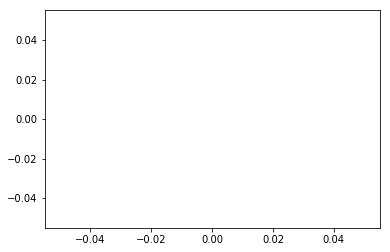

In [35]:
plt.plot()

In [36]:
def function1(x):
    return 1/(1+np.exp(-x))
    

In [37]:
def function2(x):
    return x * (1.0-x)
    

In [39]:
function2(function1(0))

0.25

In [40]:
def op(x):
    if(x%3 == 1):
        return x%3
    else:
        return x+op(x-1)

In [41]:
op(316)

1

In [42]:
def over(list_a, list_b):
    out = [i for i in list_a if i in list_b]
    return out

In [45]:
over([],[])

[]

In [47]:
class One(object):
    def method1(self):
        print("Method1, class One")
    def method2(self):
        print("Method2, class One")
    def method3(self):
        raise Exception("Empty method")

class Two(One):
    def method1(self):
        super(Two, self).method1()
        print("Method1, class Two")
              
class Three(One):
    def method1(self):
        super(Three, self).method1()
        print("Method1, class Three")
    def method2(self):
        super(Three, self).method2()
        print("Method2, class Three")
              
class Fourth(Three, Two):
    def method1(self):
        super(Fourth, self).method1()
        print("Method1, class Fourth")
    def method2(self):
        super(Fourth, self).method2()
        print("Method2, class Fourth")    
              
firstObject = One()
secondObject = Two()
thirdObject = Three()
fourthObject = Fourth()              
              
fourthObject.method2()              

Method2, class One
Method2, class Three
Method2, class Fourth


In [48]:
def f(x):
    x /= 2
    return x+3

def g(x,y):
    x *= y+2
    return x

def h(x,y):
    return x*y

out = g(f(4), h(3,2))

In [49]:
out

40.0

In [56]:
def rev(n):
    rev = 0
    while(n != 0):
        f = n % 10
        n = n // 10
        r = 10 * n + rev
    return rev

In [57]:
rev(123)

0

In [68]:
def divisors(num):
    list_of_div = []
    for i in range(1, num+1):
        if num % i == 0:
            list_of_div.append(i)
    return list_of_div

In [69]:
divisors(12)

[1, 2, 3, 4, 6, 12]

In [76]:
A = '----'.join([' ', ' ', ' ', ' ',' '])
#B = '|||||'.join(["-","-","-","-","-"])
#print('\n'.join((A,B,A,B,A,B,A,B,A)))
print('\n'.join((A,A, A,A)))

 ---- ---- ---- ---- 
 ---- ---- ---- ---- 
 ---- ---- ---- ---- 
 ---- ---- ---- ---- 


In [85]:
def draw_g(n):
    for i in range(n):
        print("| |" * (n+1))
        print('*** ' * (n-1) + "*")
    print('*** ' * (n-1) + "*")

In [86]:
draw_g(4)

| || || || || |
*** *** *** *
| || || || || |
*** *** *** *
| || || || || |
*** *** *** *
| || || || || |
*** *** *** *
*** *** *** *


In [87]:
def fn(numbers):
    return [i for i in numbers if i%3==0]

In [88]:
fn([1,2,3,4,5,6])

[3, 6]

In [89]:
def find_num(sorted_list, num):
    if len(sorted_list)==0:
        return False
    else:
        mid=len(sorted_list)//2
        if (sorted_list[mid]==num):
           return  True
        else:
            if sorted_list[mid]<num:
                return bin(lisorted_listst[mid+1:],num)
            else:
                return bin(sorted_list[:mid],num)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 4)

In [90]:
def concatenate(list1, list2):
    current = list1
    while current.next != None:
        current = current.next
    current.next = list2
    return list1


In [91]:
concatenate([1,2,3],[4,5,6])

AttributeError: 'list' object has no attribute 'next'

In [3]:
import datetime
def get_month_name(index):
    month_names = ["January", "February", "March", "April", "May", "June",
                    "July", "August", "September", "October", "November", "December"]
    return month_names[index + 1]

In [4]:
get_month_name(datetime.datetime.today().month) + " " + str(datetime.datetime.today().year)

'November 2018'

In [13]:
date1 = datetime.datetime.strptime("May 2018", "%B %Y")
date2 = datetime.datetime.strptime("May 2016", "%B %Y")

In [12]:
from dateutil import relativedelta

In [16]:
r = relativedelta.relativedelta(date1, date2)
r.months * (r.years+1)

0

In [17]:
def months_difference(d1, d2):
    return d1.month - d2.month + 12*(d1.year - d2.year)

In [18]:
months(date1, date2)

24

In [21]:
int("October 2014")

ValueError: invalid literal for int() with base 10: 'October 2014'

In [22]:
int("2014")

2014